<a href="https://colab.research.google.com/github/electrojam/Curso-de-Decision-Trees-y-Random-Forest-con-Python-y-scikit-learn/blob/main/decision_tree_random_forest_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [1]:
#Importamos las librerias principales

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [2]:
#Cargamos dataset a utilizar

df_car = pd.read_csv('car_evaluation.csv', header=None) # header=None, dataframe sin nombre de columnas
df_car

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Análisis exploratorio de datos

In [3]:
#Visualizacion del dataframe

df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
#Analizamos el shape del objeto

print(df_car.shape)

(1728, 7)


In [5]:
#Como podemos observar vamos a renombrar las columnas de manera correcta

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [6]:
#Vericamos la transformacion

df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [7]:
#Visualizamos los tipos de datos

df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [8]:
# Exploremos un poco mas la variable target

df_car['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
#Verificamos valores missings = null

df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [10]:
#Separamos en X e y

X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [11]:
#Importamos las librerias necesarias para la creacion del modelo

from sklearn.model_selection import train_test_split

#30% para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
#Veamos que obtuvimos

X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [13]:
y_train.shape, y_test.shape

((1209,), (519,))

In [14]:
#Veamos que tenemos. Por ejemplo, en X_train

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [15]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

# Entrenamiento de modelo de clasificación con árbol de decisión

In [16]:
# Instalamos libreria category-encoders en google colab
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 906.0 kB/s eta 0:00:00


In [17]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
#convertimos variables categóricas a variables numéricas, en X_train

import category_encoders as ce

# definimos variable encoder

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
#Verificamos la transformacion

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2


In [20]:
#Importar árbol de decisión

from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
# Definimos objeto que tendrá el modelo

tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [21]:
#Entrenamiento

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [22]:
#Calculo de las predicciones en Train y Test

y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [23]:
y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [24]:
print(y_train_pred_tree.shape)
print(y_test_pred_tree.shape)

(1209,)
(519,)


### Evaluación de modelo de clasificación con árbol de decisión

In [25]:
#Calculo de metricas
# importamos librerias

from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test

test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es:', train_accuracy_tree)
print('El accuracy en test es:', test_accuracy_tree)

El accuracy en train es: 0.7733664185277088
El accuracy en test es: 0.7591522157996147


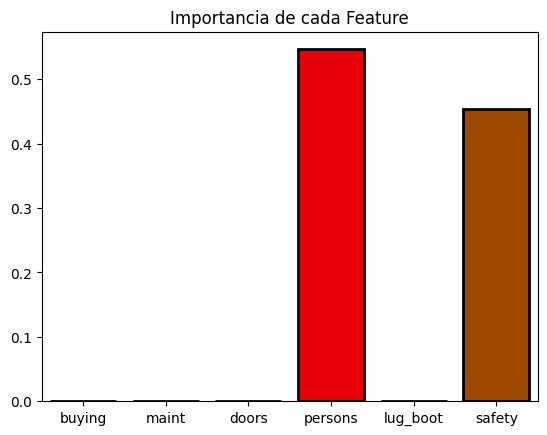

In [26]:
#Verificamos el feature importances
# Importamos librería

import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

# Reto entrenamiento solamente con features persons y security

In [27]:
# Procesamiento de datos
# Separamos en X e y

Xreto = df_car.drop(['buying','maint','doors','lug_boot','class'], axis=1)
yreto = df_car['class']

# 30% para test y 70% para train
Xreto_train, Xreto_test, yreto_train, yreto_test = train_test_split(Xreto, yreto, test_size=0.30, random_state=42)

In [28]:
print(Xreto_train.shape, Xreto_test.shape)
print(yreto_train.shape, yreto_test.shape)

(1209, 2) (519, 2)
(1209,) (519,)


In [29]:
# Entrenamiento de modelo de clasificación con árbol de decisión

#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
#convertimos variables categóricas a variables numéricas, en X_train

# Definimos variable encoder

encoder_reto = ce.OrdinalEncoder(cols = ['persons', 'safety'])

Xreto_train = encoder_reto.fit_transform(Xreto_train)
Xreto_test = encoder_reto.transform(Xreto_test)

#verificamos la transformación
Xreto_train.head()

,persons,safety
1178,1,1
585,2,2
1552,1,3
1169,3,1
1033,3,3


In [30]:
Xreto_test.head()

,persons,safety
599,3,1
1201,1,3
628,3,3
1498,1,3
1263,2,2


In [31]:
# Creación del modelo
# definimos objeto que tendrá el modelo

tree_reto = DecisionTreeClassifier(max_depth=2, random_state=0)

# Entrenamiento

tree_reto.fit(Xreto_train, yreto_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [32]:
# Cálculo de las predicciones en Train y Test

yreto_train_pred_tree = tree_reto.predict(Xreto_train)
yreto_test_pred_tree = tree_reto.predict(Xreto_test)

In [33]:
# Evaluación de modelo
# cálculo de métricas

# Cálculo de accuracy en train

train_reto_accuracy_tree = accuracy_score(yreto_train, yreto_train_pred_tree)

# Cálculo de accuracy en test

test_reto_accuracy_tree = accuracy_score(yreto_test, yreto_test_pred_tree)

print('El accuracy en train es: ', train_reto_accuracy_tree)
print('El accuracy en test es: ', test_reto_accuracy_tree)

El accuracy en train es:  0.7733664185277088
El accuracy en test es:  0.7591522157996147


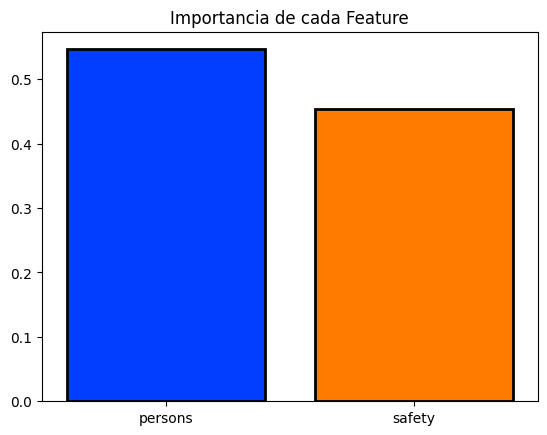

In [34]:
# Verificamos Features importances

importances_reto = tree_reto.feature_importances_
columns_reto = Xreto.columns
data_reto = pd.DataFrame([importances_reto], columns=columns_reto)
sns.barplot(data_reto, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

## Entrenamiento de modelo de clasificación con random forest

In [35]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [36]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [37]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en train es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

El accuracy en train es: 0.9942100909842845
El accuracy en test es: 0.8863198458574181


In [38]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

Text(0.5, 1.0, 'Visualizando los features Importances')

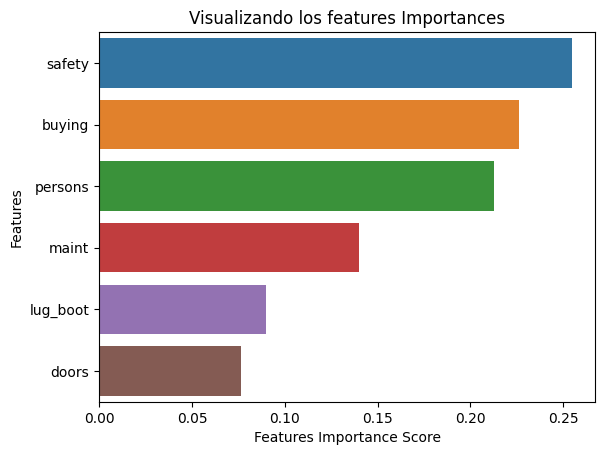

In [39]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores, y=features_scores.index, hue=features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Features')
plt.title('Visualizando los features Importances')

In [40]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)

print('Matriz de confusión\n\n', cm)

Matriz de confusión

 [[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


In [41]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519



## Reto Entrenamiento Random Forest solamente con features safety, buying, persons, maint,

In [116]:
# procesamiento de datos
# separamos X e y

Xr = df_car.drop(['doors','class'], axis=1)
yr = df_car['class']

# 30% para tet y 70% par train

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.30, random_state=42)

In [117]:
Xr

,buying,maint,persons,lug_boot,safety
0,vhigh,vhigh,2,small,low
1,vhigh,vhigh,2,small,med
2,vhigh,vhigh,2,small,high
3,vhigh,vhigh,2,med,low
4,vhigh,vhigh,2,med,med
...,...,...,...,...,...
1723,low,low,more,med,med
1724,low,low,more,med,high
1725,low,low,more,big,low
1726,low,low,more,big,med


In [118]:
print(Xr_train.shape, Xr_test.shape)
print(yr_train.shape, yr_test.shape)

(1209, 5) (519, 5)
(1209,) (519,)


In [119]:
Xr_train.dtypes

buying      object
maint       object
persons     object
lug_boot    object
safety      object
dtype: object

In [120]:
# Importante: todos nuestros tipos de datos son object, realizamos una transformación
# Convertimos variables categóricas a variables numéricas, en Xr_train y Xr_test

import category_encoders as ce

# Definimos variable encoder
encoder_r = ce.OrdinalEncoder(cols=['buying','maint','persons','safety', 'lug_boot'])

Xr_train = encoder_r.fit_transform(Xr_train)
Xr_test = encoder_r.transform(Xr_test)

In [121]:
# Entrenamiento de modelo de clasifiación con random forest

# Importamos librería random forest
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(n_estimators = 10, random_state=0)
rfr.fit(Xr_train, yr_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [122]:
# Cálculo de las predicciones en Train y Test

yr_train_pred_rf = rfr.predict(Xr_train)
yr_test_pred_rf = rfr.predict(Xr_test)

In [123]:
# Evaluación del modelo de clasificación con random forest

# Cálculo de métricas
from sklearn.metrics import accuracy_score

# Calculo el accuracy en Train
train_accuracy_rfr = accuracy_score(yr_train, yr_train_pred_rf)

# Calculo el accuracy en Test
test_accuracy_rfr = accuracy_score(yr_test, yr_test_pred_rf)

print('El accuracy de Train es:', train_accuracy_rfr)
print('El accuracy de Test es:', test_accuracy_rfr)

El accuracy de Train es: 0.9685690653432589
El accuracy de Test es: 0.9267822736030829


In [124]:
# Visualizacion de las features importantes
features_scores_r = pd.Series(rfr.feature_importances_, index=Xr_train.columns).sort_values(ascending=False)
features_scores_r

safety      0.293761
buying      0.218216
persons     0.209176
maint       0.164456
lug_boot    0.114391
dtype: float64

Text(0.5, 1.0, 'Visualiznado features más importantes')

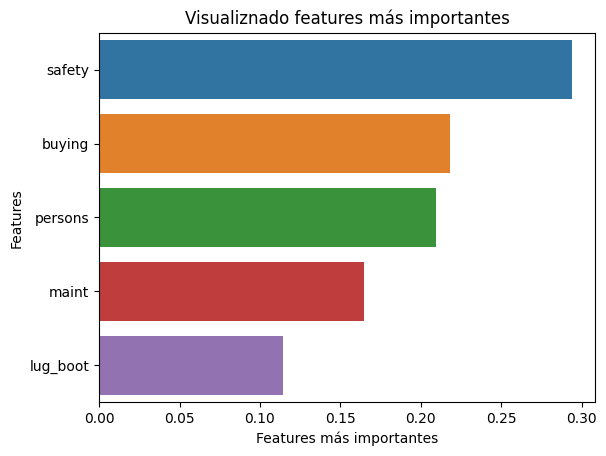

In [125]:
# Gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores_r, y=features_scores_r.index, hue=features_scores_r.index)
plt.xlabel('Features más importantes')
plt.ylabel('Features')
plt.title('Visualiznado features más importantes')